# RandomForestRegression on Energy Dataset

### - What is Random Forest Regression?
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.


## without Scaling (Anamolies affecting the results)


In [13]:
import pandas as pd
import urllib
from urllib import request
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
import numpy as np
import sklearn 
from sklearn import preprocessing
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time


url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
data = pd.read_csv(url)
data['date'] = pd.to_datetime(data['date'])
data['year'], data['month'] , data['time'] , data['hour'] ,data['day'] , data['day_of_week'],data['Numerical_Week'] = data['date'].dt.year, data['date'].dt.month , data['date'].dt.time , data['date'].dt.hour , data['date'].dt.day , data['date'].dt.weekday_name,data['date'].dt.weekday
data['weekStatus'] = data['date'].dt.dayofweek
data['WeekStatus'] = np.where(data['weekStatus'] < 5, 'Weekday', 'Weekend')
d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

data.head(5)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,year,month,time,hour,day,day_of_week,Numerical_Week,weekStatus,WeekStatus,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,2016,1,17:00:00,17,11,Monday,0,0,Weekday,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,2016,1,17:10:00,17,11,Monday,0,0,Weekday,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,2016,1,17:20:00,17,11,Monday,0,0,Weekday,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,2016,1,17:30:00,17,11,Monday,0,0,Weekday,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,2016,1,17:40:00,17,11,Monday,0,0,Weekday,63600


In [14]:
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('time',1)
data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [15]:
# defining feature matrix(X) and response vector(y)
X = data1
y = data.Appliances
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=1)


predicted_train : [ 54.5  31.4  70.3 ...,  98.   61.4  38.6]
predicted_test : [  39.7   63.1  116.2 ...,  154.9  335.9  100.2]
test_mae : 33.7195237291
train_mae : 12.516070653
test_rmse : 70.754915396
train_rmse : 26.8473651391
test_r2 : 0.526223578378
train_r2 : 0.931262111263
test_mape : 32.9071757993
train_mape : 12.2806935685
Variance score: 0.5262235783783045


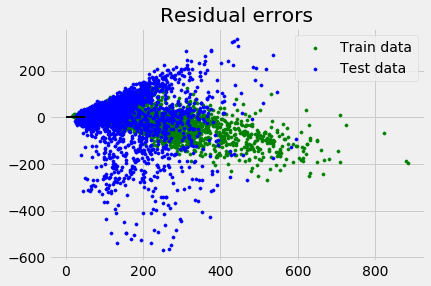

In [16]:
reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)

#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
#data_test_predicted=reg.predict(data_test1)

#datapredict_test=reg.predict(data_test1)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))
#print("data_test_predicted : " + str(data_test_predicted))
#print("predicted_test : " + str(datapredict_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()



### HIT and TRIAL for the Train and Test Division, to get the best results

Division : Train = 80 Test = 20

RMSE : 75.93
R2 : 0.475

Division : Train = 75 Test = 25

RMSE : 75.02
R2 : 0.485

Division : Train = 70 Test = 30

RMSE : 74.70
R2 : 0.471

Division : Train = 65 Test = 35

RMSE : 74.02
R2 : 0.476

Division : Train = 60 Test = 40

RMSE : 75.47
R2 : 0.45

#### Division 75, 25 and 70,30 were giving almost similar results so we selected 70,30 to maintain linearity

### HIT and TRIAL for the number of trees(estimators), to get the best results

n_estimators = 5

RMSE : 77.54
R2 : 0.43

n_estimators = 10

RMSE : 74.63
R2 : 0.472

n_estimators = 20

RMSE : 72.66
R2 : 0.50

n_estimators = 25

RMSE : 71.76
R2 : 0.50

n_estimators = 30

RMSE : 71.76
R2 : 0.51

n_estimators = 50

RMSE : 71.01
R2 : 0.521

n_estimators = 100

RMSE : 70.75
R2 : 0.526

#### Selected estimator value : 100


 ## with Appliances Scaled

In [17]:
data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [18]:
a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data1['appliances_scaler']  = appliances_scaler
data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,28.642668,28.642668,2016,1,17,11,0,0,62400,0.037383
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.410389,45.410389,2016,1,17,11,0,0,63000,0.037383
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,10.084097,10.084097,2016,1,17,11,0,0,63600,0.046729


In [19]:
data2 = data1.drop('appliances_scaler',1)
data2.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [20]:
X = data2
y = data1.appliances_scaler
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

predicted_train : [ 0.0411215   0.02009346  0.05663551 ...,  0.07766355  0.0482243
  0.02588785]
predicted_test : [ 0.02775701  0.05        0.09953271 ...,  0.13392523  0.30934579
  0.07785047]
test_mae : 0.0316425458569
train_mae : 0.0117429087922
test_rmse : 0.0663916418841
train_rmse : 0.0251871246934
test_r2 : 0.522410703736
train_r2 : 0.930734401744
test_mape : 0.198
train_mape : 0.0748076923077
Variance score: 0.5224107037358212


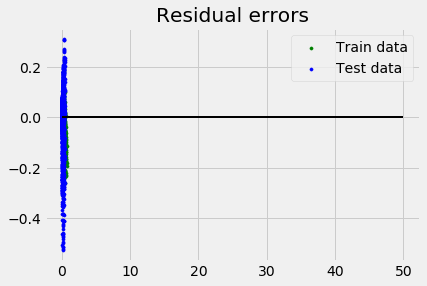

In [21]:


reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

### Wrong Results : The above model didnt gave us correct result, coz if we scale on the appliances, the effect of the all the features(Unscaled) on the scaled Appliances will definetly give the wrong results. So we move fwd with scaling the whole data using MinMax Method.

## All these trials to make sure Anamolies dont impact our RMSE and R2, which plays a important role in model selection

## with scaling whole data

In [22]:
data1.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729


In [23]:
data2.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800


predicted_train : [ 0.04130841  0.02009346  0.05663551 ...,  0.07766355  0.0482243
  0.02588785]
predicted_test : [ 0.02803738  0.04971963  0.09906542 ...,  0.13392523  0.30934579
  0.07757009]
test_mae : 0.0316596716581
train_mae : 0.0117375573203
test_rmse : 0.0664123804005
train_rmse : 0.0251772069935
test_r2 : 0.522112291464
train_r2 : 0.930788939145
test_mape : 0.1975
train_mape : 0.0744444444444
Variance score: 0.5221122914637413


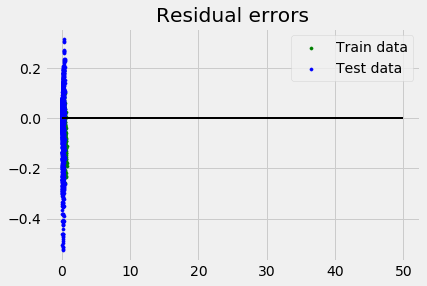

In [24]:
X = data2
y = data1.appliances_scaler


 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
 
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

# RANDOM FOREST REGRESSOR on the already given Training and Testing data with scaling the same data

In [25]:
df_train = pd.read_csv("training.csv")
X_train = df_train.drop("Appliances",1)
y_train = pd.DataFrame(df_train["Appliances"])
df_test = pd.read_csv("testing.csv")
X_test = df_test.drop("Appliances",1)
y_test = pd.DataFrame(df_test["Appliances"])
X_train = X_train.set_index('date')
X_train = X_train.drop('Day_of_week',1)
X_train = X_train.drop('WeekStatus',1)
X_test = X_test.set_index('date')
X_test = X_test.drop('Day_of_week',1)
X_test = X_test.drop('WeekStatus',1)
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = pd.DataFrame(df_train["Appliances"])
a1 = y_train.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
y_train['appliances_scaler']  = appliances_scaler
y_train = y_train.drop("Appliances",1)


y_test = pd.DataFrame(df_test["Appliances"])

a4 = y_test.Appliances
a5 = a4.values
a6 = a5.reshape((len(a5), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a6)
y_test['appliances_scaler']  = appliances_scaler
y_test = y_test.drop("Appliances",1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


predicted_train : [ 0.05028037  0.04962617  0.04588785 ...,  0.10971963  0.36420561
  0.35691589]
predicted_test : [ 0.05570093  0.08046729  0.11046729 ...,  0.08065421  0.12504673
  0.32700935]
test_mae : 0.0309653094821
train_mae : 0.0115155806382
test_rmse : 0.0665134694189
train_rmse : 0.024336805297
test_r2 : 0.518483608403
train_r2 : 0.935864115392


## # from the above regession we came to know that the rmse / r2 for the spliting we performed on our data is better for modeling then what we got from the already given train test split. Hence we decided to move fwd to our dataset

# RANDOM FOREST REGRESSOR with FeatureSelection Method : Feature Importance

In [48]:
X = data2
y = data.appliances_scaler
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

predicted_train : [ 0.0488785   0.0211215   0.05850467 ...,  0.08429907  0.0471028
  0.02457944]
predicted_test : [ 0.02785047  0.04897196  0.09439252 ...,  0.12420561  0.30158879
  0.0828972 ]
test_mae : 0.0310248805535
train_mae : 0.011538206533
test_rmse : 0.0659838299143
train_rmse : 0.0250716017945
test_r2 : 0.528259887375
train_r2 : 0.931368329786
test_mape : 0.198
train_mape : 0.0733333333333
Variance score: 0.5282598873749815


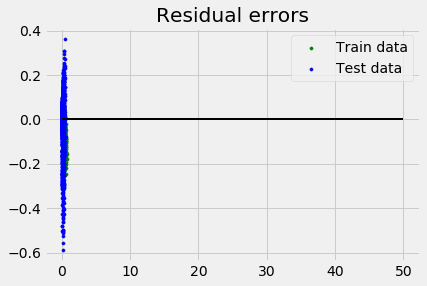

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

# RANDOM FOREST REGRESSOR with FeatureSelection Method : Select Kbest {Not applicable fr our data set)

# RANDOM FOREST REGRESSOR with FeatureSelection Method : Select from Model

In [19]:
a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data['appliances_scaler']  = appliances_scaler

d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

data1 = data.set_index('date', 1)
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('time',1)
#data1 = data1.drop('T1', 1)
#data1 = data1.drop('T2', 1)
#data1 = data1.drop('T3', 1)
data1 = data1.drop('T5', 1)
data1 = data1.drop('T6', 1)
data1 = data1.drop('T7', 1)
#data1 = data1.drop('T8', 1)
#data1 = data1.drop('T9', 1)
data1 = data1.drop('T_out',1)
#data1 = data1.drop('RH_1',1)
#data1 = data1.drop('RH_3',1)
#data1 = data1.drop('RH_4',1)
#data1 = data1.drop('RH_2',1)
data1 = data1.drop('RH_5',1)
#data1 = data1.drop('RH_6',1)
data1 = data1.drop('RH_7',1)
#data1 = data1.drop('RH_8',1)
#data1 = data1.drop('RH_9',1)
data1 = data1.drop('RH_out',1)
data1 = data1.drop('rv1',1)
data1 = data1.drop('rv2',1)
#data1 = data1.drop('Windspeed',1)
#data1 = data1.drop('RH_out',1)
data1 = data1.drop('Visibility',1)
#data1 = data1.drop('Tdewpoint',1)
#data1 = data1.drop('hour',1)
data1 = data1.drop('Numerical_Week',1)
data1 = data1.drop('weekStatus',1)
#data1 = data1.drop('Press_mm_hg',1)
data1 = data1.drop('year',1)
data1 = data1.drop('month',1)
data1 = data1.drop('day',1)
data1 = data1.drop('NSM',1)
data1.head(2)
data2 = data1.drop('appliances_scaler',1)
data2.head(1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,RH_6,T8,RH_8,T9,RH_9,Press_mm_hg,Windspeed,Tdewpoint,hour
date,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,84.256667,18.2,48.9,17.033333,45.53,733.5,7.0,5.3,17


In [50]:
X = data2
y = data.appliances_scaler
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

predicted_train : [ 0.0488785   0.0211215   0.05850467 ...,  0.08429907  0.0471028
  0.02457944]
predicted_test : [ 0.02785047  0.04897196  0.09439252 ...,  0.12420561  0.30158879
  0.0828972 ]
test_mae : 0.0310248805535
train_mae : 0.011538206533
test_rmse : 0.0659838299143
train_rmse : 0.0250716017945
test_r2 : 0.528259887375
train_r2 : 0.931368329786
test_mape : 0.198
train_mape : 0.0733333333333
Variance score: 0.5282598873749815


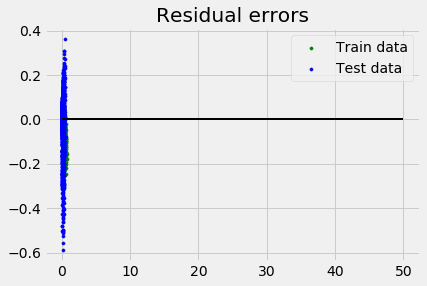

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

#  RANDOM FOREST REGRESSOR with FeatureSelection Method : RFE

In [53]:
d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data['appliances_scaler']  = appliances_scaler
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('appliances_scaler', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('weekStatus',1)
#data1 = data1.drop('appliances_scaler',1)
data1 = data1.drop('time',1)
data1 = data1.drop('T1',1)
data1 = data1.drop('T4',1)
data1 = data1.drop('T6',1)
data1 = data1.drop('T2',1)
data1 = data1.drop('T9',1)
data1 = data1.drop('RH_3',1)
#data1 = data1.drop('RH_6',1)
#data1 = data1.drop('RH_8',1)
#data1 = data1.drop('RH_9',1)
data1 = data1.drop('rv1',1)
data1 = data1.drop('rv2',1)
data1 = data1.drop('year',1)
data1 = data1.drop('month',1)
data1 = data1.drop('day',1)
data1 = data1.drop('Numerical_Week',1)
data1 = data1.drop('Windspeed',1)
data1 = data1.drop('Visibility',1)
data1 = data1.drop('WeekStatus',1)

data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,RH_1,RH_2,T3,RH_4,T5,RH_5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Tdewpoint,hour,NSM
date,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,47.596667,44.790000,19.79,45.566667,17.166667,55.20,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,5.3,17,61200
2016-01-11 17:10:00,30,46.693333,44.722500,19.79,45.992500,17.166667,55.20,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,5.2,17,61800
2016-01-11 17:20:00,30,46.300000,44.626667,19.79,45.890000,17.166667,55.09,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,5.1,17,62400
2016-01-11 17:30:00,40,46.066667,44.590000,19.79,45.723333,17.166667,55.09,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.8,92.0,5.0,17,63000
2016-01-11 17:40:00,40,46.333333,44.530000,19.79,45.530000,17.200000,55.09,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.9,92.0,4.9,17,63600


predicted_train : [ 0.08542056  0.03719626  0.34345794 ...,  0.08700935  0.04579439
  0.03046729]
predicted_test : [ 0.02915888  0.05327103  0.10803738 ...,  0.03962617  0.10373832
  0.04626168]
test_mae : 0.0371182549105
train_mae : 0.0137919929275
test_rmse : 0.0749279573579
train_rmse : 0.0283582291872
test_r2 : 0.3891311477
train_r2 : 0.912176569934
test_mape : 0.2475
train_mape : 0.09
Variance score: 0.3891311476998098


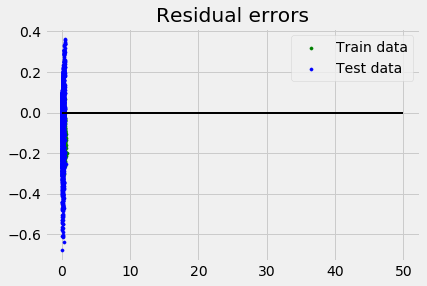

In [54]:
X = data1
y = data.appliances_scaler
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

# RANDOM FOREST REGRESSOR with FeatureSelection Method : Forward Selection

In [27]:


d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data['appliances_scaler']  = appliances_scaler
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('appliances_scaler', 1)
data1 = data1.drop('day_of_week',1)
#data1 = data1.drop('weekStatus',1)
#data1 = data1.drop('appliances_scaler',1)
data1 = data1.drop('time',1)
data1 = data1.drop('T1',1)
data1 = data1.drop('T4',1)
data1 = data1.drop('T5',1)
data1 = data1.drop('T7',1)
#data1 = data1.drop('T9',1)
data1 = data1.drop('RH_4',1)
data1 = data1.drop('RH_5',1)
data1 = data1.drop('RH_6',1)
data1 = data1.drop('RH_9',1)
data1 = data1.drop('rv1',1)
data1 = data1.drop('rv2',1)
data1 = data1.drop('year',1)
#data1 = data1.drop('month',1)
data1 = data1.drop('day',1)
#data1 = data1.drop('Numerical_Week',1)
#data1 = data1.drop('Windspeed',1)
#data1 = data1.drop('Visibility',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('Press_mm_hg',1)
data1 = data1.drop('Tdewpoint',1)
data1 = data1.drop('NSM',1)

data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,RH_1,T2,RH_2,T3,RH_3,T6,RH_7,T8,RH_8,T9,T_out,RH_out,Windspeed,Visibility,month,hour,Numerical_Week,weekStatus
date,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,47.596667,19.2,44.790000,19.79,44.730000,7.026667,41.626667,18.2,48.900000,17.033333,6.600000,92.0,7.000000,63.000000,1,17,0,0
2016-01-11 17:10:00,30,46.693333,19.2,44.722500,19.79,44.790000,6.833333,41.560000,18.2,48.863333,17.066667,6.483333,92.0,6.666667,59.166667,1,17,0,0
2016-01-11 17:20:00,30,46.300000,19.2,44.626667,19.79,44.933333,6.560000,41.433333,18.2,48.730000,17.000000,6.366667,92.0,6.333333,55.333333,1,17,0,0
2016-01-11 17:30:00,40,46.066667,19.2,44.590000,19.79,45.000000,6.433333,41.290000,18.1,48.590000,17.000000,6.250000,92.0,6.000000,51.500000,1,17,0,0
2016-01-11 17:40:00,40,46.333333,19.2,44.530000,19.79,45.000000,6.366667,41.230000,18.1,48.590000,17.000000,6.133333,92.0,5.666667,47.666667,1,17,0,0


predicted_train : [ 0.03831776  0.01775701  0.05607477 ...,  0.08785047  0.04672897
  0.02336449]
predicted_test : [ 0.02990654  0.04953271  0.10373832 ...,  0.08878505  0.34485981
  0.09813084]
test_mae : 0.0327570014537
train_mae : 0.0129874338508
test_rmse : 0.0690873724064
train_rmse : 0.0303571295293
test_r2 : 0.482839772488
train_r2 : 0.899380579308
test_mape : 0.2
train_mape : 0.0714285714286
Variance score: 0.4828397724880239


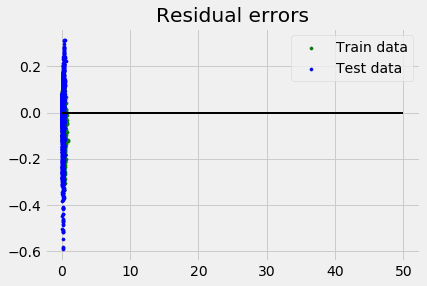

In [28]:
X = data1
y = data.appliances_scaler
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

# RANDOM FOREST REGRESSOR with Stepwise Regression

In [30]:


d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data['appliances_scaler']  = appliances_scaler
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('appliances_scaler', 1)
data1 = data1.drop('day_of_week',1)
#data1 = data1.drop('weekStatus',1)
#data1 = data1.drop('appliances_scaler',1)
data1 = data1.drop('time',1)
data1 = data1.drop('T1',1)
data1 = data1.drop('T4',1)
data1 = data1.drop('T5',1)
data1 = data1.drop('T7',1)
#data1 = data1.drop('T9',1)
data1 = data1.drop('RH_4',1)
data1 = data1.drop('RH_5',1)
data1 = data1.drop('RH_6',1)
data1 = data1.drop('RH_9',1)
data1 = data1.drop('rv1',1)
data1 = data1.drop('rv2',1)
data1 = data1.drop('year',1)
#data1 = data1.drop('month',1)
data1 = data1.drop('day',1)
#data1 = data1.drop('Numerical_Week',1)
#data1 = data1.drop('Windspeed',1)
#data1 = data1.drop('Visibility',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('Press_mm_hg',1)
data1 = data1.drop('Tdewpoint',1)
data1 = data1.drop('NSM',1)

data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,RH_1,T2,RH_2,T3,RH_3,T6,RH_7,T8,RH_8,T9,T_out,RH_out,Windspeed,Visibility,month,hour,Numerical_Week,weekStatus
date,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,47.596667,19.2,44.790000,19.79,44.730000,7.026667,41.626667,18.2,48.900000,17.033333,6.600000,92.0,7.000000,63.000000,1,17,0,0
2016-01-11 17:10:00,30,46.693333,19.2,44.722500,19.79,44.790000,6.833333,41.560000,18.2,48.863333,17.066667,6.483333,92.0,6.666667,59.166667,1,17,0,0
2016-01-11 17:20:00,30,46.300000,19.2,44.626667,19.79,44.933333,6.560000,41.433333,18.2,48.730000,17.000000,6.366667,92.0,6.333333,55.333333,1,17,0,0
2016-01-11 17:30:00,40,46.066667,19.2,44.590000,19.79,45.000000,6.433333,41.290000,18.1,48.590000,17.000000,6.250000,92.0,6.000000,51.500000,1,17,0,0
2016-01-11 17:40:00,40,46.333333,19.2,44.530000,19.79,45.000000,6.366667,41.230000,18.1,48.590000,17.000000,6.133333,92.0,5.666667,47.666667,1,17,0,0


predicted_train : [ 0.03738318  0.02149533  0.05981308 ...,  0.07196262  0.04579439
  0.02429907]
predicted_test : [ 0.02990654  0.05046729  0.0953271  ...,  0.06915888  0.25233645
  0.08037383]
test_mae : 0.0331946958947
train_mae : 0.0129385196381
test_rmse : 0.0697232776275
train_rmse : 0.0299740168549
test_r2 : 0.473275698095
train_r2 : 0.901904225702
test_mape : 0.2
train_mape : 0.07
Variance score: 0.473275698095072


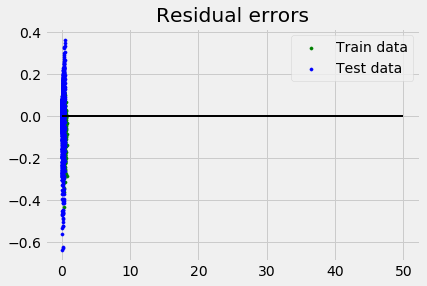

In [31]:
X = data1
y = data.appliances_scaler
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators =100, random_state = 1,n_jobs=-1)
reg.fit(X_train, y_train)
#Doing predictions on training and test data 
predicted_train=reg.predict(X_train)
predicted_test=reg.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))


#### MAE Calculation of model
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))


#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=reg.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



from scipy import stats
def mean_absolute_percentage_error1(y_test,x_predict):
    #np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.abs((y_test - x_predict)/y_test)
test_mape = mean_absolute_percentage_error1(y_test, predicted_test)
train_mape = mean_absolute_percentage_error1(y_train, predicted_train)
print("test_mape : " + str(np.median(test_mape)))
print("train_mape : " + str(np.median(train_mape)))


 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()